## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    input_layer=keras.layers.Input([x_train.shape[-1]])
    x=keras.layers.Dense(units=512, activation="relu")(input_layer)
    x=keras.layers.Dense(units=256, activation="relu")(x)
    x=keras.layers.Dense(units=128, activation="relu")(x)
    out=keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [9]:
model = build_mlp()
model.summary()
optimizer=keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 226us/step - loss: 1.9643 - accuracy: 0.2905 - val_loss: 1.7889 - val_accuracy: 0.3651
Epoch 2/500
50000/50000 [==============================] - 10s 207us/step - loss: 1.7302 - accuracy: 0.3787 - val_loss: 1.7163 - val_accuracy: 0.3770
Epoch 3/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.6366 - accuracy: 0.4159 - val_loss: 1.5863 - val_accuracy: 0.4337
Epoch 4/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.5648 - accuracy: 0.4390 - val_loss: 1.5453 - val_accuracy: 0.4478
Epoch 5/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.5243 - accuracy: 0.4552 - val_loss: 1.5401 - val_accuracy: 0.4477
Epoch 6/500
50000/50000 [==============================] - 11s 213us/step - loss: 1.4852 - accuracy: 0.4700 - val_loss: 1.4801 - val_accuracy: 0.4690
Epoch 7/500
50000/50000 [=========================

50000/50000 [==============================] - 9s 185us/step - loss: 0.5983 - accuracy: 0.7860 - val_loss: 1.9171 - val_accuracy: 0.5198
Epoch 56/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.5875 - accuracy: 0.7897 - val_loss: 1.8902 - val_accuracy: 0.5284
Epoch 57/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.5724 - accuracy: 0.7964 - val_loss: 1.8793 - val_accuracy: 0.5263
Epoch 58/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.5641 - accuracy: 0.7974 - val_loss: 1.9246 - val_accuracy: 0.5171
Epoch 59/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.5536 - accuracy: 0.8036 - val_loss: 2.0034 - val_accuracy: 0.5164
Epoch 60/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.5478 - accuracy: 0.8055 - val_loss: 2.0259 - val_accuracy: 0.5175
Epoch 61/500
50000/50000 [==============================] - 9s 185us/step - loss: 0.5353 - accuracy: 0.8080 - val

50000/50000 [==============================] - 11s 215us/step - loss: 0.2626 - accuracy: 0.9059 - val_loss: 3.4297 - val_accuracy: 0.5062
Epoch 110/500
50000/50000 [==============================] - 33s 659us/step - loss: 0.3011 - accuracy: 0.8922 - val_loss: 3.5149 - val_accuracy: 0.5030
Epoch 111/500
50000/50000 [==============================] - 19s 390us/step - loss: 0.2883 - accuracy: 0.8960 - val_loss: 3.5429 - val_accuracy: 0.5090
Epoch 112/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.2631 - accuracy: 0.9046 - val_loss: 3.4243 - val_accuracy: 0.4950
Epoch 113/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.2582 - accuracy: 0.9073 - val_loss: 3.4107 - val_accuracy: 0.5092
Epoch 114/500
50000/50000 [==============================] - 39s 777us/step - loss: 0.2379 - accuracy: 0.9138 - val_loss: 3.3899 - val_accuracy: 0.5120
Epoch 115/500
50000/50000 [==============================] - 13s 267us/step - loss: 0.2318 - accuracy:

50000/50000 [==============================] - 15s 306us/step - loss: 0.1571 - accuracy: 0.9436 - val_loss: 4.6131 - val_accuracy: 0.4961
Epoch 164/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.1522 - accuracy: 0.9447 - val_loss: 4.5739 - val_accuracy: 0.5087
Epoch 165/500
50000/50000 [==============================] - 12s 231us/step - loss: 0.1809 - accuracy: 0.9361 - val_loss: 4.6516 - val_accuracy: 0.4986
Epoch 166/500
50000/50000 [==============================] - 42s 833us/step - loss: 0.1792 - accuracy: 0.9370 - val_loss: 4.6683 - val_accuracy: 0.4993
Epoch 167/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.1728 - accuracy: 0.9389 - val_loss: 4.7715 - val_accuracy: 0.4964
Epoch 168/500
50000/50000 [==============================] - 11s 224us/step - loss: 0.1767 - accuracy: 0.9365 - val_loss: 4.6351 - val_accuracy: 0.5085
Epoch 169/500
50000/50000 [==============================] - 33s 661us/step - loss: 0.1840 - accuracy: 

50000/50000 [==============================] - 42s 848us/step - loss: 0.1390 - accuracy: 0.9513 - val_loss: 5.5270 - val_accuracy: 0.5028
Epoch 218/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.1606 - accuracy: 0.9440 - val_loss: 5.4520 - val_accuracy: 0.4919
Epoch 219/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.1705 - accuracy: 0.9397 - val_loss: 5.5479 - val_accuracy: 0.4986
Epoch 220/500
50000/50000 [==============================] - 33s 670us/step - loss: 0.1381 - accuracy: 0.9521 - val_loss: 5.6118 - val_accuracy: 0.4963
Epoch 221/500
50000/50000 [==============================] - 20s 391us/step - loss: 0.1493 - accuracy: 0.9478 - val_loss: 5.6224 - val_accuracy: 0.4984
Epoch 222/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.1744 - accuracy: 0.9391 - val_loss: 5.5112 - val_accuracy: 0.4980
Epoch 223/500
50000/50000 [==============================] - 12s 234us/step - loss: 0.1292 - accuracy: 

50000/50000 [==============================] - 37s 738us/step - loss: 0.1052 - accuracy: 0.9624 - val_loss: 6.1738 - val_accuracy: 0.5021
Epoch 272/500
50000/50000 [==============================] - 15s 298us/step - loss: 0.0923 - accuracy: 0.9676 - val_loss: 6.3381 - val_accuracy: 0.4976
Epoch 273/500
50000/50000 [==============================] - 11s 217us/step - loss: 0.1739 - accuracy: 0.9422 - val_loss: 6.2714 - val_accuracy: 0.4893
Epoch 274/500
50000/50000 [==============================] - 12s 239us/step - loss: 0.1722 - accuracy: 0.9434 - val_loss: 6.1165 - val_accuracy: 0.4930
Epoch 275/500
50000/50000 [==============================] - 42s 832us/step - loss: 0.0990 - accuracy: 0.9664 - val_loss: 6.0993 - val_accuracy: 0.5021
Epoch 276/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0793 - accuracy: 0.9718 - val_loss: 6.2200 - val_accuracy: 0.5002
Epoch 277/500
50000/50000 [==============================] - 12s 230us/step - loss: 0.0578 - accuracy: 

50000/50000 [==============================] - 41s 827us/step - loss: 0.0740 - accuracy: 0.9743 - val_loss: 6.7704 - val_accuracy: 0.4951
Epoch 326/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.1507 - accuracy: 0.9518 - val_loss: 6.7200 - val_accuracy: 0.4735
Epoch 327/500
50000/50000 [==============================] - 12s 236us/step - loss: 0.2129 - accuracy: 0.9341 - val_loss: 6.6043 - val_accuracy: 0.4918
Epoch 328/500
50000/50000 [==============================] - 33s 655us/step - loss: 0.0977 - accuracy: 0.9669 - val_loss: 6.7654 - val_accuracy: 0.5068
Epoch 329/500
50000/50000 [==============================] - 19s 388us/step - loss: 0.0747 - accuracy: 0.9751 - val_loss: 6.6843 - val_accuracy: 0.5019
Epoch 330/500
50000/50000 [==============================] - 11s 221us/step - loss: 0.0444 - accuracy: 0.9850 - val_loss: 6.8173 - val_accuracy: 0.5041
Epoch 331/500
50000/50000 [==============================] - 12s 240us/step - loss: 0.0486 - accuracy:

Epoch 379/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.2426 - accuracy: 0.9319 - val_loss: 6.7538 - val_accuracy: 0.4864
Epoch 380/500
50000/50000 [==============================] - 11s 227us/step - loss: 0.2030 - accuracy: 0.9379 - val_loss: 6.7452 - val_accuracy: 0.4992
Epoch 381/500
50000/50000 [==============================] - 12s 233us/step - loss: 0.0673 - accuracy: 0.9772 - val_loss: 6.6150 - val_accuracy: 0.4992
Epoch 382/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.0356 - accuracy: 0.9885 - val_loss: 6.7361 - val_accuracy: 0.5007
Epoch 383/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.0186 - accuracy: 0.9952 - val_loss: 6.9069 - val_accuracy: 0.5025
Epoch 384/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.0126 - accuracy: 0.9971 - val_loss: 7.0395 - val_accuracy: 0.5056
Epoch 385/500
50000/50000 [==============================] - 11s 226us/step - loss: 0.01

Epoch 433/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 6.7173 - val_accuracy: 0.5004
Epoch 434/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.0226 - accuracy: 0.9936 - val_loss: 6.6504 - val_accuracy: 0.5040
Epoch 435/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.0426 - accuracy: 0.9869 - val_loss: 7.1095 - val_accuracy: 0.4925
Epoch 436/500
50000/50000 [==============================] - 13s 255us/step - loss: 0.2981 - accuracy: 0.9158 - val_loss: 6.7776 - val_accuracy: 0.4875
Epoch 437/500
50000/50000 [==============================] - 12s 240us/step - loss: 0.0972 - accuracy: 0.9674 - val_loss: 6.4780 - val_accuracy: 0.5002
Epoch 438/500
50000/50000 [==============================] - 11s 216us/step - loss: 0.0409 - accuracy: 0.9867 - val_loss: 6.8090 - val_accuracy: 0.4972
Epoch 439/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.02

Epoch 487/500
50000/50000 [==============================] - 11s 214us/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 7.1417 - val_accuracy: 0.5056
Epoch 488/500
50000/50000 [==============================] - 11s 213us/step - loss: 0.0037 - accuracy: 0.9997 - val_loss: 7.1581 - val_accuracy: 0.5094
Epoch 489/500
50000/50000 [==============================] - 13s 265us/step - loss: 0.0037 - accuracy: 0.9996 - val_loss: 7.2360 - val_accuracy: 0.5038
Epoch 490/500
50000/50000 [==============================] - 11s 219us/step - loss: 0.0046 - accuracy: 0.9995 - val_loss: 7.4969 - val_accuracy: 0.5031
Epoch 491/500
50000/50000 [==============================] - 11s 219us/step - loss: 0.6484 - accuracy: 0.8561 - val_loss: 5.9439 - val_accuracy: 0.4793
Epoch 492/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.1509 - accuracy: 0.9508 - val_loss: 6.0905 - val_accuracy: 0.4994
Epoch 493/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.03

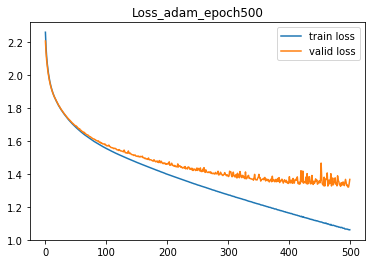

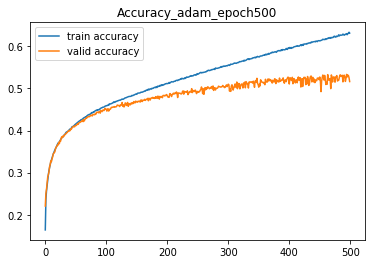

In [18]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline  
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss_adam_epoch500")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy_adam_epoch500")
plt.show()

## Optimizer: SGD 
## Epoch: 500


In [14]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

def build_mlp():
    input_layer=keras.layers.Input([x_train.shape[-1]])
    x=keras.layers.Dense(units=512, activation="relu")(input_layer)
    x=keras.layers.Dense(units=256, activation="relu")(x)
    x=keras.layers.Dense(units=128, activation="relu")(x)
    out=keras.layers.Dense(units=10, activation="softmax")(x)
    
    model_SGD = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model_SGD
model = build_mlp()

model.summary()
optimizer=keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)



Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 144us/step - loss: 2.2592 - accuracy: 0.1638 - val_loss: 2.2058 - val_accuracy: 0.2205
Epoch 2/500
50000/50000 [==============================] - 8s 156us/step - loss: 2.1689 - accuracy: 0.2362 - val_loss: 2.1376 - val_accuracy: 0.2504
Epoch 3/500
50000/50000 [==============================] - 8s 153us/step - loss: 2.1110 - accuracy: 0.2567 - val_loss: 2.0896 - val_accuracy: 0.2608
Epoch 4/500
50000/50000 [==============================] - 8s 154us/step - loss: 2.0691 - accuracy: 0.2698 - val_loss: 2.0531 - val_accuracy: 0.2764
Epoch 5/500
50000/50000 [==============================] - 9s 184us/step - loss: 2.0358 - accuracy: 0.2828 - val_loss: 2.0233 - val_accuracy: 0.2900
Epoch 6/500
50000/50000 [==============================] - 8s 166us/step - loss: 2.0082 - accuracy: 0.2949 - val_loss: 1.9979 - val_accuracy: 0.2948
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 7s 138us/step - loss: 1.6686 - accuracy: 0.4203 - val_loss: 1.6775 - val_accuracy: 0.4147
Epoch 56/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.6651 - accuracy: 0.4219 - val_loss: 1.6729 - val_accuracy: 0.4183
Epoch 57/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.6620 - accuracy: 0.4229 - val_loss: 1.6742 - val_accuracy: 0.4189
Epoch 58/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.6589 - accuracy: 0.4233 - val_loss: 1.6664 - val_accuracy: 0.4195
Epoch 59/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.6557 - accuracy: 0.4251 - val_loss: 1.6642 - val_accuracy: 0.4208
Epoch 60/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.6527 - accuracy: 0.4260 - val_loss: 1.6625 - val_accuracy: 0.4214
Epoch 61/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.6496 - accuracy: 0.4260 - val

50000/50000 [==============================] - 17s 337us/step - loss: 1.5385 - accuracy: 0.4642 - val_loss: 1.5595 - val_accuracy: 0.4545
Epoch 110/500
50000/50000 [==============================] - 31s 621us/step - loss: 1.5366 - accuracy: 0.4644 - val_loss: 1.5589 - val_accuracy: 0.4554
Epoch 111/500
50000/50000 [==============================] - 21s 417us/step - loss: 1.5350 - accuracy: 0.4654 - val_loss: 1.5582 - val_accuracy: 0.4549
Epoch 112/500
50000/50000 [==============================] - 37s 747us/step - loss: 1.5331 - accuracy: 0.4658 - val_loss: 1.5553 - val_accuracy: 0.4559
Epoch 113/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.5311 - accuracy: 0.4680 - val_loss: 1.5531 - val_accuracy: 0.4557
Epoch 114/500
50000/50000 [==============================] - 38s 754us/step - loss: 1.5293 - accuracy: 0.4678 - val_loss: 1.5554 - val_accuracy: 0.4570
Epoch 115/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.5277 - accuracy: 

50000/50000 [==============================] - 8s 153us/step - loss: 1.4515 - accuracy: 0.4935 - val_loss: 1.4963 - val_accuracy: 0.4722
Epoch 164/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.4501 - accuracy: 0.4942 - val_loss: 1.4929 - val_accuracy: 0.4743
Epoch 165/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.4486 - accuracy: 0.4937 - val_loss: 1.4949 - val_accuracy: 0.4716
Epoch 166/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.4475 - accuracy: 0.4956 - val_loss: 1.4908 - val_accuracy: 0.4737
Epoch 167/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.4456 - accuracy: 0.4958 - val_loss: 1.4901 - val_accuracy: 0.4741
Epoch 168/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.4444 - accuracy: 0.4969 - val_loss: 1.4913 - val_accuracy: 0.4755
Epoch 169/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.4430 - accuracy: 0.4960

50000/50000 [==============================] - 8s 167us/step - loss: 1.3759 - accuracy: 0.5196 - val_loss: 1.4418 - val_accuracy: 0.4891
Epoch 218/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.3749 - accuracy: 0.5188 - val_loss: 1.4605 - val_accuracy: 0.4785
Epoch 219/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.3738 - accuracy: 0.5200 - val_loss: 1.4416 - val_accuracy: 0.4895
Epoch 220/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.3720 - accuracy: 0.5210 - val_loss: 1.4482 - val_accuracy: 0.4887
Epoch 221/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.3711 - accuracy: 0.5207 - val_loss: 1.4490 - val_accuracy: 0.4889
Epoch 222/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.3698 - accuracy: 0.5219 - val_loss: 1.4474 - val_accuracy: 0.4888
Epoch 223/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.3679 - accuracy: 0.5231

50000/50000 [==============================] - 8s 157us/step - loss: 1.3081 - accuracy: 0.5429 - val_loss: 1.4064 - val_accuracy: 0.5009
Epoch 272/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.3067 - accuracy: 0.5438 - val_loss: 1.4121 - val_accuracy: 0.5007
Epoch 273/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.3058 - accuracy: 0.5439 - val_loss: 1.4025 - val_accuracy: 0.5037
Epoch 274/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.3038 - accuracy: 0.5451 - val_loss: 1.4046 - val_accuracy: 0.5046
Epoch 275/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.3029 - accuracy: 0.5448 - val_loss: 1.4013 - val_accuracy: 0.4989
Epoch 276/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.3020 - accuracy: 0.5455 - val_loss: 1.4022 - val_accuracy: 0.5060
Epoch 277/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.3007 - accuracy: 0.5458

50000/50000 [==============================] - 7s 141us/step - loss: 1.2451 - accuracy: 0.5654 - val_loss: 1.3897 - val_accuracy: 0.5012
Epoch 326/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.2445 - accuracy: 0.5649 - val_loss: 1.3767 - val_accuracy: 0.5129
Epoch 327/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.2431 - accuracy: 0.5673 - val_loss: 1.3808 - val_accuracy: 0.5103
Epoch 328/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2426 - accuracy: 0.5658 - val_loss: 1.3711 - val_accuracy: 0.5151
Epoch 329/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.2412 - accuracy: 0.5666 - val_loss: 1.4117 - val_accuracy: 0.5016
Epoch 330/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.2396 - accuracy: 0.5670 - val_loss: 1.3702 - val_accuracy: 0.5162
Epoch 331/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.2388 - accuracy: 0.5681

50000/50000 [==============================] - 7s 140us/step - loss: 1.1866 - accuracy: 0.5868 - val_loss: 1.3669 - val_accuracy: 0.5116
Epoch 380/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.1849 - accuracy: 0.5861 - val_loss: 1.3520 - val_accuracy: 0.5207
Epoch 381/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.1822 - accuracy: 0.5886 - val_loss: 1.3558 - val_accuracy: 0.5193
Epoch 382/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1820 - accuracy: 0.5891 - val_loss: 1.3721 - val_accuracy: 0.5161
Epoch 383/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1810 - accuracy: 0.5901 - val_loss: 1.3548 - val_accuracy: 0.5173
Epoch 384/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.1796 - accuracy: 0.5897 - val_loss: 1.3771 - val_accuracy: 0.5154
Epoch 385/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1791 - accuracy: 0.5895

50000/50000 [==============================] - 8s 157us/step - loss: 1.1284 - accuracy: 0.6082 - val_loss: 1.3823 - val_accuracy: 0.5073
Epoch 434/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.1262 - accuracy: 0.6080 - val_loss: 1.3825 - val_accuracy: 0.5101
Epoch 435/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.1247 - accuracy: 0.6088 - val_loss: 1.3431 - val_accuracy: 0.5251
Epoch 436/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.1250 - accuracy: 0.6081 - val_loss: 1.3392 - val_accuracy: 0.5290
Epoch 437/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.1229 - accuracy: 0.6104 - val_loss: 1.3432 - val_accuracy: 0.5295
Epoch 438/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1236 - accuracy: 0.6094 - val_loss: 1.3903 - val_accuracy: 0.5156
Epoch 439/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.1214 - accuracy: 0.6105

50000/50000 [==============================] - 8s 165us/step - loss: 1.0755 - accuracy: 0.6269 - val_loss: 1.3329 - val_accuracy: 0.5297
Epoch 488/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.0714 - accuracy: 0.6272 - val_loss: 1.3337 - val_accuracy: 0.5313
Epoch 489/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.0706 - accuracy: 0.6293 - val_loss: 1.3512 - val_accuracy: 0.5157
Epoch 490/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.0698 - accuracy: 0.6282 - val_loss: 1.3371 - val_accuracy: 0.5294
Epoch 491/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.0701 - accuracy: 0.6266 - val_loss: 1.3287 - val_accuracy: 0.5317
Epoch 492/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.0655 - accuracy: 0.6280 - val_loss: 1.3473 - val_accuracy: 0.5276
Epoch 493/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.0655 - accuracy: 0.6290

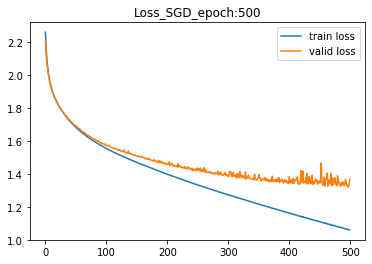

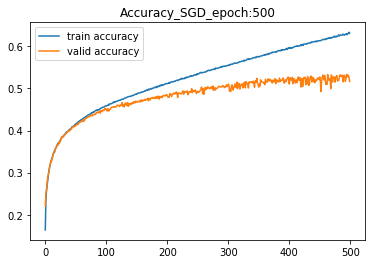

In [17]:
%matplotlib inline  
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss_SGD_epoch:500")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy_SGD_epoch:500")
plt.show()